In [22]:
!nvidia-smi

Mon Jul 15 13:31:30 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   27C    P0    51W / 400W |      2MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  Off  | 00000000:0A:00.0 Off |                    0 |
| N/A   

In [23]:
import torch


# Function to list available GPUs and select one
def select_device():
    if torch.cuda.is_available():
        print("Available GPUs:")
        for i in range(torch.cuda.device_count()):
            print(f"{i}: {torch.cuda.get_device_name(i)}")
        device_id = int(input("Select GPU by entering the device ID (default 0): ") or 0)
        if device_id < torch.cuda.device_count():
            print(f"Using GPU: {torch.cuda.get_device_name(device_id)}")
            return torch.device(f"cuda:{device_id}")
        else:
            print(f"Invalid device ID. Using GPU: {torch.cuda.get_device_name(0)}")
            return torch.device("cuda:0")
    else:
        print("No GPU available. Using CPU.")
        return torch.device("cpu")

# Select the device
device = select_device()

Available GPUs:
0: NVIDIA A100-SXM4-40GB
1: NVIDIA A100-SXM4-40GB
2: NVIDIA A100-SXM4-40GB
3: NVIDIA A100-SXM4-40GB
4: NVIDIA A100-SXM4-40GB
5: NVIDIA A100-SXM4-40GB
6: NVIDIA A100-SXM4-40GB
7: NVIDIA A100-SXM4-40GB
Select GPU by entering the device ID (default 0): 0
Using GPU: NVIDIA A100-SXM4-40GB


In [24]:
import os
import torch
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Function to load the model
def load_model(snapshot_path, model_name="FacebookAI/roberta-large", num_labels=3):
    model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    model.load_state_dict(torch.load(snapshot_path, map_location=device))
    model.to(device)
    return model

# Function to list all model snapshot files in a directory that match the naming pattern
def list_snapshot_files(snapshot_directory):
    return [os.path.join(snapshot_directory, file_name) for file_name in os.listdir(snapshot_directory) 
            if file_name.startswith('roberta_large_combined2_cycle_') and file_name.endswith('.pth')]

# Load all models
snapshot_directory = '/storage/data/st1070263'
snapshot_files = list_snapshot_files(snapshot_directory)
model_snapshots = [load_model(snapshot) for snapshot in snapshot_files]

/opt/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

In [1]:
import pandas as pd

# SNLI train dataset

df_snli_test = pd.read_csv('SNLI/snli_1.0_test.csv')

In [2]:
df_snli_test

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( has ( cracks ( in ( the c...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ ha...,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,2677109430.jpg#1,2677109430.jpg#1r1n,neutral,contradiction,contradiction,neutral,neutral
1,entailment,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( The church ) ( ( is ( filled ( with song )...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (S (NP (DT The) (NN church)) (VP (VBZ is...,This church choir sings to the masses as they ...,The church is filled with song.,2677109430.jpg#1,2677109430.jpg#1r1e,entailment,entailment,entailment,neutral,entailment
2,contradiction,( ( This ( church choir ) ) ( ( ( sings ( to (...,( ( ( A choir ) ( singing ( at ( a ( baseball ...,(ROOT (S (NP (DT This) (NN church) (NN choir))...,(ROOT (NP (NP (DT A) (NN choir)) (VP (VBG sing...,This church choir sings to the masses as they ...,A choir singing at a baseball game.,2677109430.jpg#1,2677109430.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
3,neutral,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is young ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is young.,6160193920.jpg#4,6160193920.jpg#4r1n,neutral,neutral,neutral,neutral,neutral
4,entailment,( ( ( A woman ) ( with ( ( ( ( ( a ( green hea...,( ( The woman ) ( ( is ( very happy ) ) . ) ),(ROOT (NP (NP (DT A) (NN woman)) (PP (IN with)...,(ROOT (S (NP (DT The) (NN woman)) (VP (VBZ is)...,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,6160193920.jpg#4,6160193920.jpg#4r1e,entailment,entailment,contradiction,entailment,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,contradiction,( ( Two women ) ( ( are ( ( observing somethin...,( ( ( Two women ) ( are ( standing ( with ( th...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (NP (CD Two) (NNS women)) (SBAR (...,Two women are observing something together.,Two women are standing with their eyes closed.,4378810163.jpg#4,4378810163.jpg#4r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9996,entailment,( ( Two women ) ( ( are ( ( observing somethin...,( ( Two girls ) ( ( are ( looking ( at somethi...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,(ROOT (S (NP (CD Two) (NNS girls)) (VP (VBP ar...,Two women are observing something together.,Two girls are looking at something.,4378810163.jpg#4,4378810163.jpg#4r1e,entailment,entailment,entailment,contradiction,entailment
9997,contradiction,( ( ( ( ( A man ) ( in ( a ( black ( leather j...,( ( A man ) ( ( is ( flying ( a kite ) ) ) . ) ),(ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,A man in a black leather jacket and a book in ...,A man is flying a kite.,152881593.jpg#1,152881593.jpg#1r1c,contradiction,contradiction,contradiction,contradiction,contradiction
9998,entailment,( ( ( ( ( A man ) ( in ( a ( black ( leather j...,( ( A man ) ( ( is ( speaking ( in ( a classro...,(ROOT (S (NP (NP (NP (DT A) (NN man)) (PP (IN ...,(ROOT (S (NP (DT A) (NN man)) (VP (VBZ is) (VP...,A man in a black leather jacket and a book in ...,A man is speaking in a classroom.,152881593.jpg#1,152881593.jpg#1r1e,entailment,entailment,entailment,neutral,entailment


In [4]:
df_snli_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gold_label              10000 non-null  object
 1   sentence1_binary_parse  10000 non-null  object
 2   sentence2_binary_parse  10000 non-null  object
 3   sentence1_parse         10000 non-null  object
 4   sentence2_parse         10000 non-null  object
 5   sentence1               10000 non-null  object
 6   sentence2               10000 non-null  object
 7   captionID               10000 non-null  object
 8   pairID                  10000 non-null  object
 9   label1                  10000 non-null  object
 10  label2                  10000 non-null  object
 11  label3                  10000 non-null  object
 12  label4                  10000 non-null  object
 13  label5                  9990 non-null   object
dtypes: object(14)
memory usage: 1.1+ MB


In [5]:
# Step 1: Load and preprocess the data
def load_and_preprocess_data(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)
    
    # Select only the required columns
    df = df[['sentence1', 'sentence2', 'gold_label']]
    
    # Convert sentences to lowercase to standardize the text
    df['sentence1'] = df['sentence1'].str.lower()
    df['sentence2'] = df['sentence2'].str.lower()
    
    # Mapping labels to integers
    label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}
    df['gold_label'] = df['gold_label'].map(label_mapping)
    
    # Drop rows with any missing values in these columns
    df.dropna(subset=['sentence1', 'sentence2', 'gold_label'], inplace=True)
    
    # Ensure the gold_label column is of type integer
    df['gold_label'] = df['gold_label'].astype(int)
    
    return df

# File paths
test_path = 'SNLI/snli_1.0_test.csv'

# Load and preprocess the training and development datasets
df_snli_test = load_and_preprocess_data(test_path)

# Display the first few rows of the training data to verify
df_snli_test.head()

,sentence1,sentence2,gold_label
0,this church choir sings to the masses as they ...,the church has cracks in the ceiling.,1
1,this church choir sings to the masses as they ...,the church is filled with song.,0
2,this church choir sings to the masses as they ...,a choir singing at a baseball game.,2
3,"a woman with a green headscarf, blue shirt and...",the woman is young.,1
4,"a woman with a green headscarf, blue shirt and...",the woman is very happy.,0


In [7]:
# Create copies of the original DataFrames
df_snli_test_renamed = df_snli_test.copy()


# Rename the columns in the copies
df_snli_test_renamed = df_snli_test_renamed.rename(columns={'sentence1': 'premise', 'sentence2': 'hypothesis', 'gold_label': 'label'})

# Display the first few rows of the renamed training data to verify the changes
df_snli_test_renamed.head()

,premise,hypothesis,label
0,this church choir sings to the masses as they ...,the church has cracks in the ceiling.,1
1,this church choir sings to the masses as they ...,the church is filled with song.,0
2,this church choir sings to the masses as they ...,a choir singing at a baseball game.,2
3,"a woman with a green headscarf, blue shirt and...",the woman is young.,1
4,"a woman with a green headscarf, blue shirt and...",the woman is very happy.,0


In [8]:
df_mnli_matched = pd.read_csv('MNLI/mnli_validation_matched.csv')
df_mnli_mismatched = pd.read_csv('MNLI/mnli_validation_mismatched.csv')

In [9]:
df_mnli_matched

,premise,hypothesis,label,idx
0,The new rights are nice enough,Everyone really likes the newest benefits,1,0
1,This site includes a list of all award winners...,The Government Executive articles housed on th...,2,1
2,uh i don't know i i have mixed emotions about ...,"I like him for the most part, but would still ...",0,2
3,yeah i i think my favorite restaurant is alway...,My favorite restaurants are always at least a ...,2,3
4,i don't know um do you do a lot of camping,I know exactly.,2,4
...,...,...,...,...
9810,"Since 1998, LSC has initiated and overseen sig...",LSC has been focusing on improving it's state ...,1,9810
9811,Eighty percent of pagers in the United States ...,Pagers in the United States were unaffected by...,2,9811
9812,"Finally, the FDA will conduct workshops, issue...",The FDA is set to conduct workshops.,0,9812
9813,Cirque du Soleil's The latest from the acclaim...,Cirque du Soleil is an international troupe.,0,9813


In [10]:
df_mnli_mismatched

,premise,hypothesis,label,idx
0,Your contribution helped make it possible for ...,Your contributions were of no help with our st...,2,0
1,"The answer has nothing to do with their cause,...",Dictionaries are indeed exercises in bi-unique...,2,1
2,We serve a classic Tuscan meal that includes ...,We serve a meal of Florentine terrine.,0,2
3,"A few months ago, Carl Newton and I wrote a le...",Carl Newton and I have never had any other pre...,2,3
4,"I was on this earth you know, I've lived on th...",I don't yet know the reason why I have lived o...,0,4
...,...,...,...,...
9827,Do you watch that?,Can you see?,2,9827
9828,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l...",2,9828
9829,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.,2,9829
9830,That's a good attitude!,"You feel good about this, don't you?",1,9830


In [11]:
# Concatenate the datasets
df_mnli = pd.concat([df_mnli_matched, df_mnli_mismatched], ignore_index=True)

In [12]:
df_mnli

,premise,hypothesis,label,idx
0,The new rights are nice enough,Everyone really likes the newest benefits,1,0
1,This site includes a list of all award winners...,The Government Executive articles housed on th...,2,1
2,uh i don't know i i have mixed emotions about ...,"I like him for the most part, but would still ...",0,2
3,yeah i i think my favorite restaurant is alway...,My favorite restaurants are always at least a ...,2,3
4,i don't know um do you do a lot of camping,I know exactly.,2,4
...,...,...,...,...
19642,Do you watch that?,Can you see?,2,9827
19643,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l...",2,9828
19644,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.,2,9829
19645,That's a good attitude!,"You feel good about this, don't you?",1,9830


In [13]:
def clean_text_and_label_data(df):
    # Drop any rows with NaN values
    df = df.dropna()
    
    # Ensure text columns are of string type and labels are of integer type using .loc
    df.loc[:, 'premise'] = df['premise'].astype(str)
    df.loc[:, 'hypothesis'] = df['hypothesis'].astype(str)
    df.loc[:, 'label'] = df['label'].astype(int)
    
    return df

# Clean the entire dataset first
df_mnli = clean_text_and_label_data(df_mnli)


# Check for any NaN values across the entire DataFrame
nan_check = df_mnli.isna().any().any()

# Print the result to see if there are any NaN values left
if nan_check:
    print("There are still NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


No NaN values found in the DataFrame.


In [14]:
# ANLI test dataset

# Load the data
df_anli1_test = pd.read_csv('ANLI/test_r1.csv')

df_anli2_test = pd.read_csv('ANLI/test_r2.csv')

df_anli3_test = pd.read_csv('ANLI/test_r3.csv')



df_anli1_test 

,uid,premise,hypothesis,label,reason
0,4aae63a8-fcf7-406c-a2f3-50c31c5934a9,Ernest Jones is a British jeweller and watchma...,The first Ernest Jones store was opened on the...,0,"The first store was opened in London, which is..."
1,c577b92c-78fb-4e1d-ae1d-34133609c142,Old Trafford is a football stadium in Old Traf...,There are only 10 larger football stadiums in ...,0,The text says that it is the 11th largest foot...
2,26936cd9-1a5a-4a2b-9fca-899d61880ca0,Magnus is a Belgian joint dance project of Tom...,"""The body gave you everything"" album was not r...",0,"it was released on March 29, 2004. ""not this b..."
3,cd977941-273b-4748-a5d2-6c7234a2a302,Shadowboxer is a 2005 crime thriller film dire...,Shadowboxer was written and directed by Lee Da...,1,It is not know who wrote the Shadowboxer. The ...
4,1a9eae8f-27d9-47ba-80b8-7d1402ee524a,"Takaaki Kajita (梶田 隆章 , Kajita Takaaki ) is a ...","Arthur B. McDonald is a Japanese physicist, kn...",2,Arthur B. McDonald is Canadian in the context.
...,...,...,...,...,...
995,dd928b06-dedd-4aaa-ac82-ae04e4f49c8b,L'Histoire du soldat (The Soldier's Tale) is a...,The Soldier's Tale will have seven instruments.,0,The Soldier's Tale is from the work of Alexand...
996,b827f0aa-5181-4995-b661-b0d9ac62d876,Gianluca Cologna (born 17 May 1990) is a Swiss...,Gianluca is the older brother of Dario Cologna.,1,"We don't know who is older, only when Giancarl..."
997,cd7ec92b-a7ab-4def-8b8e-77eff9604e5b,Fido Dido is a cartoon character created by Jo...,Fido Dido was first developed in the 20th cent...,0,It's definitely correct because it was develop...
998,9b55d3d2-2761-4b40-bb4f-eb5de6f9e55d,Aspects of Andrew Lloyd Webber is the second s...,The album hit number 23 in 1992,1,"Given that the album was released in November,..."


In [15]:
# Remove 'uid' and clean the ANLI round 1 train and dev datasets
df_anli1_test_cleaned = df_anli1_test.drop(columns='uid').dropna(subset=['premise', 'hypothesis', 'label', 'reason'], how='any')


# Remove 'uid' and clean the ANLI round 2 train and dev datasets
df_anli2_test_cleaned = df_anli2_test.drop(columns='uid').dropna(subset=['premise', 'hypothesis', 'label', 'reason'], how='any')


# Remove 'uid' and clean the ANLI round 3 train and dev datasets
df_anli3_test_cleaned = df_anli3_test.drop(columns='uid').dropna(subset=['premise', 'hypothesis', 'label', 'reason'], how='any')


# Verify the cleaning by checking the number of rows in each cleaned DataFrame
print("ANLI Round 1 test Cleaned:", df_anli1_test_cleaned.shape[0])

print("ANLI Round 2 test Cleaned:", df_anli2_test_cleaned.shape[0])

print("ANLI Round 3 test Cleaned:", df_anli3_test_cleaned.shape[0])


ANLI Round 1 test Cleaned: 1000
ANLI Round 2 test Cleaned: 1000
ANLI Round 3 test Cleaned: 1200


In [17]:
# List of training and development datasets
test_datasets = [df_snli_test_renamed, df_mnli, df_anli1_test_cleaned, df_anli2_test_cleaned, df_anli3_test_cleaned]


# Define the standard columns expected in all datasets
standard_columns = ['premise', 'hypothesis', 'label', 'reason', 'idx']  # Include 'idx' and 'reason' if needed

# Function to prepare datasets by ensuring all required columns are present
def prepare_datasets(datasets, columns):
    prepared_datasets = []
    for df in datasets:
        for column in columns:
            if column not in df.columns:
                df[column] = None  # Assign None or a suitable default value
        # Ensure order and columns are consistent
        prepared_datasets.append(df[columns])
    return prepared_datasets

# Prepare training and development datasets
prepared_test_datasets = prepare_datasets(test_datasets, standard_columns)

# Combine datasets
test_df = pd.concat(prepared_test_datasets, ignore_index=True)


# Display the structure and size of the combined datasets
print("Combined test Dataset Size:", test_df.shape)





Combined test Dataset Size: (32671, 5)


In [18]:
test_df

,premise,hypothesis,label,reason,idx
0,this church choir sings to the masses as they ...,the church has cracks in the ceiling.,1,None,None
1,this church choir sings to the masses as they ...,the church is filled with song.,0,None,None
2,this church choir sings to the masses as they ...,a choir singing at a baseball game.,2,None,None
3,"a woman with a green headscarf, blue shirt and...",the woman is young.,1,None,None
4,"a woman with a green headscarf, blue shirt and...",the woman is very happy.,0,None,None
...,...,...,...,...,...
32666,The papers presented show that all European co...,European countries are showing as the populati...,2,There will be a rapid increase in the next few...,None
32667,"Winning Team John C. Harsanyi, John F. Nash an...",Hard Selten was one of the people awarded the ...,2,Hard Selten does not exist making my statement...,None
32668,In an address to the IAEA board of governors i...,Hans Blix said that all construction in Vienna...,2,He said that construction in North Korea has s...,None
32669,Arromanches-les-Bains or simply Arromanches is...,Normany landings took place in the heartland.,2,I changed heart of the area to heartland.,None


In [20]:
# Remove the 'idx' column from test
test_df = test_df.drop(columns=['idx'], errors='ignore')  # errors='ignore' to avoid error if 'idx' is absent

# Print the updated DataFrame shapes to confirm removal
print("Updated Test Dataset Size:", test_df.shape)

Updated Test Dataset Size: (32671, 4)


In [21]:
test_df

,premise,hypothesis,label,reason
0,this church choir sings to the masses as they ...,the church has cracks in the ceiling.,1,None
1,this church choir sings to the masses as they ...,the church is filled with song.,0,None
2,this church choir sings to the masses as they ...,a choir singing at a baseball game.,2,None
3,"a woman with a green headscarf, blue shirt and...",the woman is young.,1,None
4,"a woman with a green headscarf, blue shirt and...",the woman is very happy.,0,None
...,...,...,...,...
32666,The papers presented show that all European co...,European countries are showing as the populati...,2,There will be a rapid increase in the next few...
32667,"Winning Team John C. Harsanyi, John F. Nash an...",Hard Selten was one of the people awarded the ...,2,Hard Selten does not exist making my statement...
32668,In an address to the IAEA board of governors i...,Hans Blix said that all construction in Vienna...,2,He said that construction in North Korea has s...
32669,Arromanches-les-Bains or simply Arromanches is...,Normany landings took place in the heartland.,2,I changed heart of the area to heartland.


In [33]:
from transformers import RobertaTokenizer
from torch.utils.data import Dataset, DataLoader
import torch

# Initialize the tokenizer
tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-large")

def tokenize_data(df):
    # Ensure all text fields are string type and handle NaN values
    df.fillna({'reason': '', 'premise': '', 'hypothesis': ''}, inplace=True)
    # Concatenate 'premise' with 'reason' if 'reason' is not empty
    texts = df.apply(lambda x: x['premise'] + " " + x['reason'] if x['reason'] else x['premise'], axis=1)
    encodings = tokenizer(texts.tolist(), df['hypothesis'].tolist(), padding=True, truncation=True, return_tensors="pt")
    return encodings

class TestDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Tokenize data
test_encodings = tokenize_data(test_df)
test_dataset = TestDataset(test_encodings, test_df['label'].tolist())

# DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Now you can use test_loader with your model for evaluation or training


In [46]:
from tqdm import tqdm
import torch
from torch.nn.functional import softmax



def get_model_probabilities(model, loader):
    model.eval()
    all_probabilities = []
    with torch.no_grad():
        for batch in tqdm(loader, desc=f"Calculating probabilities for {model.__class__.__name__}"):
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            outputs = model(**inputs)
            probabilities = softmax(outputs.logits, dim=-1)
            all_probabilities.append(probabilities.cpu())
    return torch.cat(all_probabilities, dim=0)

# Collect probabilities for each model
model_probabilities = {}
for i, model in enumerate(model_snapshots):
    print(f"Processing Model {i+1}")
    probabilities = get_model_probabilities(model, test_loader)
    model_probabilities[f'model_{i+1}_probabilities'] = probabilities.numpy()



Processing Model 1


Calculating probabilities for RobertaForSequenceClassification: 100%|█| 1021/102


Processing Model 2


Calculating probabilities for RobertaForSequenceClassification: 100%|█| 1021/102


Processing Model 3


Calculating probabilities for RobertaForSequenceClassification: 100%|█| 1021/102


Processing Model 4


Calculating probabilities for RobertaForSequenceClassification: 100%|█| 1021/102


Processing Model 5


Calculating probabilities for RobertaForSequenceClassification: 100%|█| 1021/102


In [49]:
# Initialize an empty DataFrame
probabilities_df = pd.DataFrame()

# Iterate through each model's probabilities and add them to the DataFrame
for model_key, probs_tensor in model_probabilities.items():
    for class_index in range(probs_tensor.shape[1]):  # Assuming class_index matches with the number of classes
        probabilities_df[f'{model_key}_class_{class_index}'] = probs_tensor[:, class_index]

# Include true labels for reference
probabilities_df['True_labels'] = test_df['label'].values

# Save the DataFrame to a CSV file for external analysis if needed
probabilities_df.to_csv('model_class_probabilities.csv', index=False)
print("Model class probabilities stored in 'model_class_probabilities.csv'")

Model class probabilities stored in 'model_class_probabilities.csv'


In [50]:
probabilities_df

,model_1_probabilities_class_0,model_1_probabilities_class_1,model_1_probabilities_class_2,model_2_probabilities_class_0,model_2_probabilities_class_1,model_2_probabilities_class_2,model_3_probabilities_class_0,model_3_probabilities_class_1,model_3_probabilities_class_2,model_4_probabilities_class_0,model_4_probabilities_class_1,model_4_probabilities_class_2,model_5_probabilities_class_0,model_5_probabilities_class_1,model_5_probabilities_class_2,True_labels
0,0.002558,0.963910,0.033532,0.012313,0.828616,0.159071,0.001454,0.903294,0.095252,0.016045,0.772954,0.211002,0.000321,0.986562,0.013117,1
1,0.722726,0.260186,0.017089,0.724158,0.259982,0.015860,0.501593,0.468073,0.030334,0.796141,0.166530,0.037330,0.880955,0.117322,0.001723,0
2,0.000208,0.000909,0.998883,0.000300,0.013686,0.986014,0.000231,0.000310,0.999459,0.000728,0.009018,0.990253,0.000033,0.000157,0.999809,2
3,0.006930,0.992720,0.000350,0.004949,0.993137,0.001914,0.006404,0.993202,0.000394,0.004272,0.986235,0.009493,0.002151,0.996828,0.001020,1
4,0.400550,0.598658,0.000791,0.414285,0.582562,0.003154,0.507073,0.492060,0.000866,0.392712,0.600057,0.007231,0.640505,0.358365,0.001130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32666,0.069646,0.035341,0.895013,0.135796,0.072816,0.791389,0.036731,0.061469,0.901800,0.251307,0.080863,0.667830,0.001608,0.012340,0.986052,2
32667,0.027814,0.018184,0.954002,0.079630,0.043768,0.876602,0.016928,0.018516,0.964556,0.095152,0.035295,0.869553,0.002093,0.006906,0.991001,2
32668,0.066878,0.026386,0.906736,0.038684,0.102084,0.859233,0.023562,0.005308,0.971129,0.010289,0.043700,0.946012,0.000288,0.000555,0.999157,2
32669,0.895615,0.066444,0.037941,0.726439,0.065069,0.208491,0.549825,0.063563,0.386611,0.692292,0.105726,0.201982,0.806709,0.147908,0.045383,2


In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Load the DataFrame, if not already loaded
# probabilities_df = pd.read_csv('model_class_probabilities.csv')  # Uncomment if loading from file

# Function to calculate accuracy
def calculate_accuracy(df, model_indices, true_labels):
    accuracies = {}
    for i in model_indices:
        predicted_labels = df[[f'model_{i}_probabilities_class_0', f'model_{i}_probabilities_class_1', f'model_{i}_probabilities_class_2']].idxmax(axis=1)
        predicted_labels = predicted_labels.str.extract('(\d+)$').astype(int)
        accuracies[f'model_{i}'] = accuracy_score(true_labels, predicted_labels)
    return accuracies

# Calculate accuracy for each model
model_indices = range(1, 6)  # Adjust based on your model count
accuracies = calculate_accuracy(probabilities_df, model_indices, probabilities_df['True_labels'])
print("Accuracies:", accuracies)

# Function to calculate correlation matrix
def calculate_correlations(df, model_indices):
    n_models = len(model_indices)
    correlation_matrix = np.zeros((n_models, n_models))
    for i in model_indices:
        for j in model_indices:
            true_class_probs_i = df.apply(lambda row: row[f'model_{i}_probabilities_class_{int(row["True_labels"])}'], axis=1)
            true_class_probs_j = df.apply(lambda row: row[f'model_{j}_probabilities_class_{int(row["True_labels"])}'], axis=1)
            correlation_matrix[i-1, j-1] = np.corrcoef(true_class_probs_i, true_class_probs_j)[0, 1]
    return correlation_matrix

# Calculate correlations
correlations = calculate_correlations(probabilities_df, model_indices)
print("Correlation matrix:\n", correlations)


Accuracies: {'model_1': 0.8707722444981788, 'model_2': 0.8750573903461786, 'model_3': 0.8695785252976646, 'model_4': 0.8719965718833216, 'model_5': 0.8654464203728077}
Correlation matrix:
 [[1.         0.84794884 0.85936142 0.82937379 0.83319064]
 [0.84794884 1.         0.8026003  0.87410725 0.79999833]
 [0.85936142 0.8026003  1.         0.78477473 0.85060842]
 [0.82937379 0.87410725 0.78477473 1.         0.7850371 ]
 [0.83319064 0.79999833 0.85060842 0.7850371  1.        ]]


In [57]:
import numpy as np
import pandas as pd

# Assuming probabilities_df is loaded and contains probabilities for each model
n_models = 5  # Adjust according to how many models you have

# Compute the average probabilities across all models
average_probs = np.mean([
    probabilities_df[[f'model_{i}_probabilities_class_0', f'model_{i}_probabilities_class_1', f'model_{i}_probabilities_class_2']].values
    for i in range(1, n_models + 1)
], axis=0)

# Determine predicted labels from the average probabilities
predicted_labels_from_average = np.argmax(average_probs, axis=1)

# Calculate accuracy of the averaged model
average_model_accuracy = np.mean(predicted_labels_from_average == probabilities_df['True_labels'].values)
print("Accuracy of the averaged model:", average_model_accuracy)

def one_hot_encode(labels, num_classes):
    """ Convert array of labels to one-hot encoded numpy array. """
    return np.eye(num_classes)[labels]

def categorical_cross_entropy(true_labels, predicted_probs):
    """ Compute the categorical cross-entropy loss. """
    true_labels_one_hot = one_hot_encode(true_labels, num_classes=predicted_probs.shape[1])
    log_probs = np.log(predicted_probs + 1e-15)  # Adding a small epsilon to avoid log(0)
    loss = -np.sum(true_labels_one_hot * log_probs) / true_labels_one_hot.shape[0]
    return loss

# Calculate loss for the averaged model
true_labels = probabilities_df['True_labels'].values
loss = categorical_cross_entropy(true_labels, average_probs)
print("Categorical Cross-Entropy Loss of the averaged model:", loss)


Accuracy of the averaged model: 0.8819136237029782
Categorical Cross-Entropy Loss of the averaged model: 0.3149100072837741


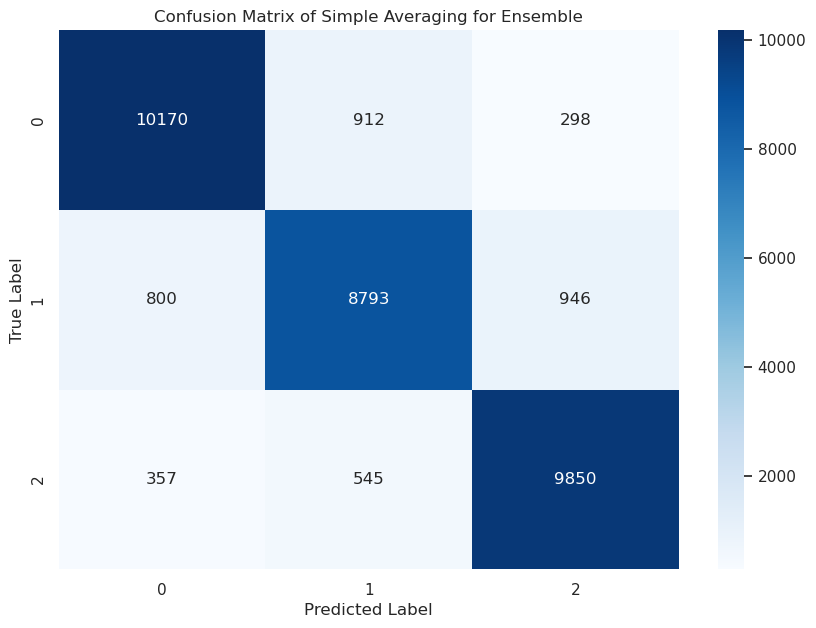

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, predicted_labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    """ Plot a confusion matrix using Seaborn's heatmap. """
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plotting the confusion matrix for the Averaged Model
plot_confusion_matrix(true_labels, predicted_labels_from_average, 'Confusion Matrix of Simple Averaging for Ensemble')


Accuracy of the majority vote: 0.8810565945333783
Adjusted Categorical Cross-Entropy Loss for the majority vote: 0.465336623638422


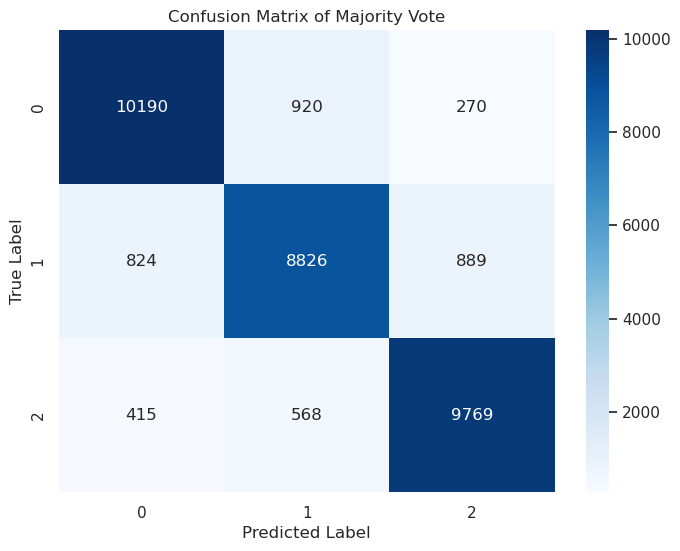

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming model_prob_df is already defined and loaded with appropriate data
n_models = 5  # Assuming there are five models
num_classes = 3  # Assuming three classes for the task

# Function to one-hot encode labels
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

# Function to smooth labels for cross-entropy calculation
def smooth_one_hot(true_labels, num_classes, smoothing=0.1):
    """
    Apply label smoothing. Default epsilon is 0.1.
    This helps to mitigate the issue with hard zero probabilities leading to infinite loss.
    """
    confidence = 1.0 - smoothing
    smooth_prob = smoothing / num_classes
    one_hot_labels = np.eye(num_classes)[true_labels]
    return one_hot_labels * confidence + smooth_prob

# Function to compute categorical cross-entropy loss
def categorical_cross_entropy(true_labels, predicted_probs):
    log_probs = np.log(predicted_probs + 1e-15)  # Adding a small epsilon to avoid log(0)
    loss = -np.sum(true_labels * log_probs) / true_labels.shape[0]
    return loss

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, title='Confusion Matrix'):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Extract predicted labels for each model using corrected column names
predicted_labels = {}
for i in range(1, n_models + 1):
    probs = model_prob_df[[f'model_{i}_probabilities_class_0', f'model_{i}_probabilities_class_1', f'model_{i}_probabilities_class_2']].values
    predicted_labels[f'model_{i}'] = np.argmax(probs, axis=1)

# Constructing an array of all predictions
all_predictions = np.vstack([predicted_labels[f'model_{i}'] for i in range(1, n_models + 1)])

# Majority vote calculation
majority_vote = np.apply_along_axis(lambda x: np.bincount(x, minlength=num_classes).argmax(), 0, all_predictions)

# Calculate the accuracy of the majority vote
true_labels = model_prob_df['True_labels'].values
majority_vote_accuracy = accuracy_score(true_labels, majority_vote)

print("Accuracy of the majority vote:", majority_vote_accuracy)

# Calculate the smoothed probabilities for the majority vote predictions
majority_vote_smooth_probs = smooth_one_hot(majority_vote, num_classes)
loss = categorical_cross_entropy(one_hot_encode(true_labels, num_classes), majority_vote_smooth_probs)

print("Adjusted Categorical Cross-Entropy Loss for the majority vote:", loss)

# Plot the confusion matrix
plot_confusion_matrix(true_labels, majority_vote, 'Confusion Matrix of Majority Vote')
